# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#needed for making sure we don't make more api calls than needed
import time
#needed to get datetime of data collection
from datetime import date

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data\cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# print(f'{len(cities)} also ex: {cities[0]}')


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#setup for api call
api_key = 'fd717f3fa4f5129692190b1aab425cb5'
base_call = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=metric&q="
weather_data = []
calls = 0

#api call

print("Beginning Data Retrieval\n -----------------------------")

for city in cities:
    
    #request weather     
    current_weather = requests.get(base_call+city)
    
    #conditional check on whether call was succesful or not
    if current_weather.status_code == 200:
        
        calls += 1
        print(f'Processing Record {calls} | {city}')
        weather_data.append(current_weather.json())
        
        #wait 1 second as only 60 per minute are allowed
        time.sleep(1)
    else:
        print("City not found. Skipping...")

#record the date at which the data was all collected on

today = date.today()
timestamp = today.strftime("%B %d, %Y")


Beginning Data Retrieval
 -----------------------------
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Mataura
Processing Record 2 | Faya
Processing Record 3 | Les cayes
Processing Record 4 | Qaanaaq
City not found. Skipping...
Processing Record 5 | Mosetse
Processing Record 6 | Saint-philippe
Processing Record 7 | Brae
Processing Record 8 | Pevek
Processing Record 9 | Cidreira
Processing Record 10 | Rikitea
Processing Record 11 | Butaritari
Processing Record 12 | Kapaa
Processing Record 13 | Hermanus
Processing Record 14 | Aranos
Processing Record 15 | Labuhan
Processing Record 16 | Lata
Processing Record 17 | Suntar
Processing Record 18 | Airai
Processing Record 19 | Hobart
Processing Record 20 | Albany
Processing Record 21 | Cabo san lucas
Processing Record 22 | Port elizabeth
Processing Record 23 | Hilo
Processing Record 24 | Hay river
Processing Record 25 | Kamenka
Processing Record 26 | Thompson
Processing Record 27 | Ushuaia
Processing Record 28 | 

Processing Record 231 | Mishelevka
Processing Record 232 | Pitimbu
Processing Record 233 | Banjarmasin
Processing Record 234 | Emporia
Processing Record 235 | Yarmouth
Processing Record 236 | Kaitangata
City not found. Skipping...
Processing Record 237 | Prince rupert
Processing Record 238 | Maragogi
Processing Record 239 | Pangnirtung
Processing Record 240 | Clyde river
Processing Record 241 | Saldanha
Processing Record 242 | Khomeyn
Processing Record 243 | Norman wells
Processing Record 244 | Swanton
Processing Record 245 | Sunland park
Processing Record 246 | Musiri
Processing Record 247 | Saint anthony
Processing Record 248 | Panzhihua
Processing Record 249 | Saint george
Processing Record 250 | Kyren
Processing Record 251 | Mercedes
Processing Record 252 | Aklavik
Processing Record 253 | Tortosa
Processing Record 254 | Edson
Processing Record 255 | Stepnogorsk
Processing Record 256 | Coquimbo
Processing Record 257 | Ubinskoye
City not found. Skipping...
Processing Record 258 | Tes

Processing Record 462 | Yueyang
Processing Record 463 | Easley
Processing Record 464 | Verkhnevilyuysk
Processing Record 465 | Buraydah
Processing Record 466 | Tura
Processing Record 467 | Cadillac
Processing Record 468 | Contamana
Processing Record 469 | Sawakin
Processing Record 470 | Cockburn town
City not found. Skipping...
Processing Record 471 | Alofi
City not found. Skipping...
Processing Record 472 | Dharchula
Processing Record 473 | Inuvik
Processing Record 474 | Makakilo city
Processing Record 475 | Napierville
Processing Record 476 | Tierranueva
Processing Record 477 | Vilyuysk
Processing Record 478 | Yura
Processing Record 479 | Novaya bryan
Processing Record 480 | Sinnamary
Processing Record 481 | Sisimiut
Processing Record 482 | Coxim
Processing Record 483 | Zambezi
Processing Record 484 | Bazaliya
Processing Record 485 | Sibolga
City not found. Skipping...
Processing Record 486 | Itapira
City not found. Skipping...
Processing Record 487 | Beyneu
Processing Record 488 | P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create dict with all required data for first city
city_data = weather_data[0]['main']
city_data.update(weather_data[0]['coord'])
city_data.update(weather_data[0]['clouds'])
city_data.update(weather_data[0]['wind'])

#create df with dict above
weather_df = pd.DataFrame(city_data, index = [weather_data[0]['name']])

#do the same thing for every other city and append to df
for i in range(1, len(weather_data),1):
    
    city_data = weather_data[i]['main']
    city_data.update(weather_data[i]['coord'])
    city_data.update(weather_data[i]['clouds'])
    city_data.update(weather_data[i]['wind'])

    weather_df = pd.concat([weather_df, pd.DataFrame(city_data, index = [weather_data[i]['name']])])
    


In [44]:
#rename column to a more clear name
weather_df.rename(columns = {'all':'cloudiness'})

#export df to csv
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

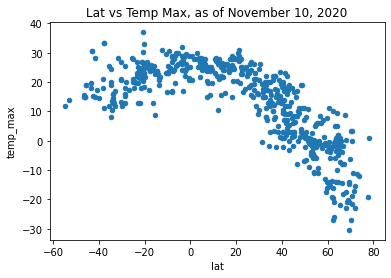

In [45]:
weather_df.plot.scatter(x='lat', y='temp_max', title= ('Lat vs Temp Max, as of '+ timestamp))
plt.savefig('output_data\LatVsTemp.png')  # saves the current figure

#### Latitude vs. Humidity Plot

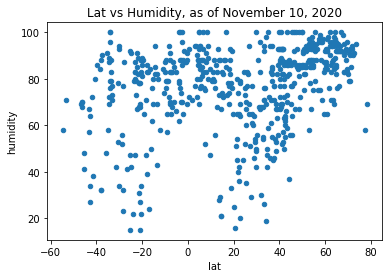

In [46]:
weather_df.plot.scatter(x='lat', y='humidity',title = (f'Lat vs Humidity, as of {timestamp}'))
plt.savefig('output_data\LatVsHum.png') 

#### Latitude vs. Cloudiness Plot

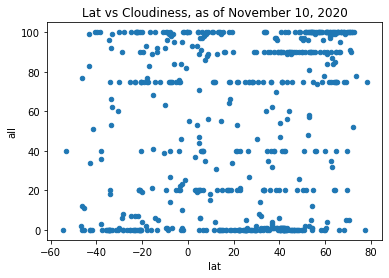

In [47]:
weather_df.plot.scatter(x='lat', y='all', title = ('Lat vs Cloudiness, as of ' + timestamp))
plt.savefig('output_data\LatVsCloud.png') 

#### Latitude vs. Wind Speed Plot

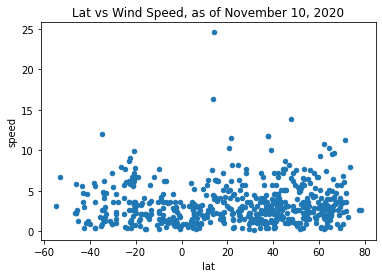

In [48]:
weather_df.plot.scatter(x='lat', y='speed',title = ('Lat vs Wind Speed, as of ' + timestamp))
plt.savefig('output_data\LatVsSpeed.png') 